In [9]:
# Install the GGally package
install.packages("GGally")
install.packages("corrplot")
install.packages("ggplot2")
install.packages("dplyr")

# Load necessary libraries
library(ggplot2)
library(dplyr)
library(GGally) # Now you can successfully load the GGally library
library(corrplot)

# Load the dataset
data <- read.csv('/content/data_application_energy (1).csv')

# Convert 'date' to Date-Time format
data$date <- as.POSIXct(data$date, format="%Y-%m-%d %H:%M:%S")

# 1. Summary statistics of the dataset
summary(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



      date                       Appliances          lights      
 Min.   :2016-01-11 17:00:00   Min.   :  10.00   Min.   : 0.000  
 1st Qu.:2016-02-14 23:15:00   1st Qu.:  50.00   1st Qu.: 0.000  
 Median :2016-03-20 05:30:00   Median :  60.00   Median : 0.000  
 Mean   :2016-03-20 05:30:00   Mean   :  97.69   Mean   : 3.802  
 3rd Qu.:2016-04-23 11:45:00   3rd Qu.: 100.00   3rd Qu.: 0.000  
 Max.   :2016-05-27 18:00:00   Max.   :1080.00   Max.   :70.000  
       T1             RH_1             T2             RH_2      
 Min.   :16.79   Min.   :27.02   Min.   :16.10   Min.   :20.46  
 1st Qu.:20.76   1st Qu.:37.33   1st Qu.:18.79   1st Qu.:37.90  
 Median :21.60   Median :39.66   Median :20.00   Median :40.50  
 Mean   :21.69   Mean   :40.26   Mean   :20.34   Mean   :40.42  
 3rd Qu.:22.60   3rd Qu.:43.07   3rd Qu.:21.50   3rd Qu.:43.26  
 Max.   :26.26   Max.   :63.36   Max.   :29.86   Max.   :56.03  
       T3             RH_3             T4             RH_4      
 Min.   :17.20   M

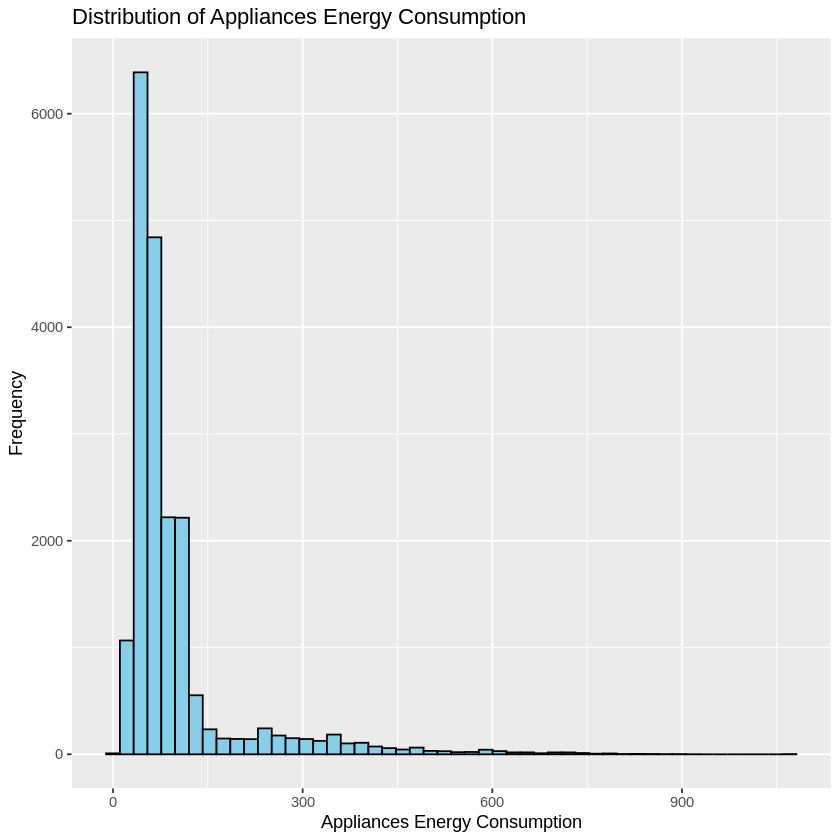

In [10]:
# 2. Distribution of energy consumption (Appliances)
ggplot(data, aes(x=Appliances)) +
  geom_histogram(bins=50, fill="skyblue", color="black") +
  ggtitle("Distribution of Appliances Energy Consumption") +
  xlab("Appliances Energy Consumption") +
  ylab("Frequency")

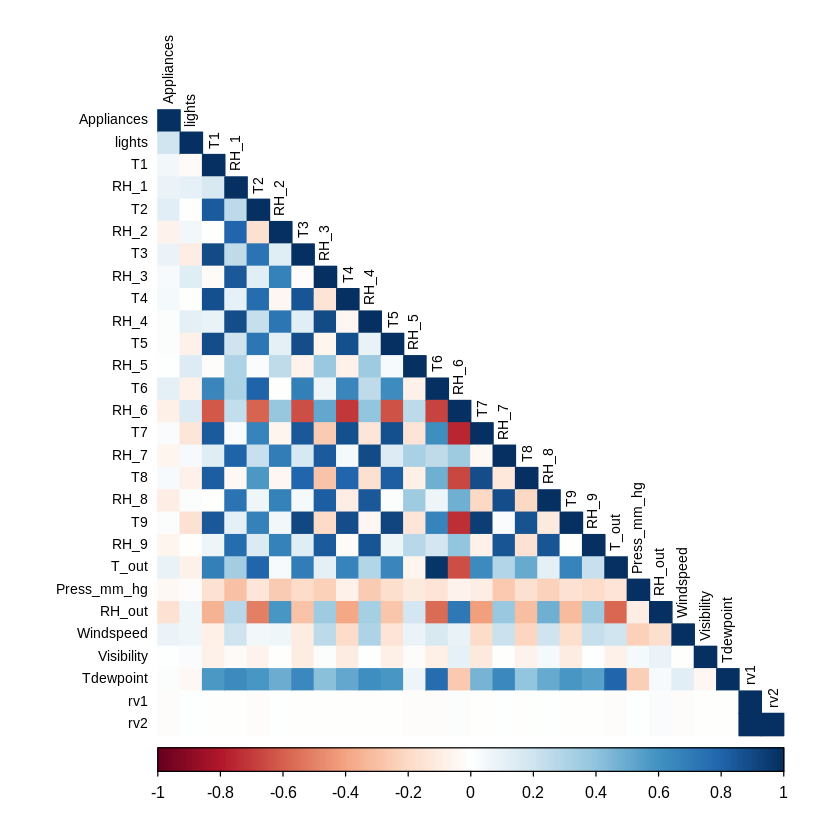

In [11]:
# 3. Correlation matrix heatmap for numeric variables
numeric_cols <- select_if(data, is.numeric)
corr_matrix <- cor(numeric_cols)
corrplot(corr_matrix, method="color", type="lower", tl.cex = 0.7, number.cex = 0.7, tl.col = "black")

In [12]:
# Linear Regression Model and Visualization
# Predicting Appliances energy consumption using a simple linear regression
model <- lm(Appliances ~ T1 + RH_1 + T_out + Windspeed, data = data)
summary(model)


Call:
lm(formula = Appliances ~ T1 + RH_1 + T_out + Windspeed, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-108.85  -47.61  -31.02   -0.32  999.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.7532    15.7467   0.746    0.455    
T1            0.6685     0.6490   1.030    0.303    
RH_1          1.2767     0.1960   6.513 7.55e-11 ***
T_out         1.2034     0.2059   5.845 5.16e-09 ***
Windspeed     2.7540     0.3187   8.642  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 19730 degrees of freedom
Multiple R-squared:  0.01677,	Adjusted R-squared:  0.01657 
F-statistic: 84.12 on 4 and 19730 DF,  p-value: < 2.2e-16


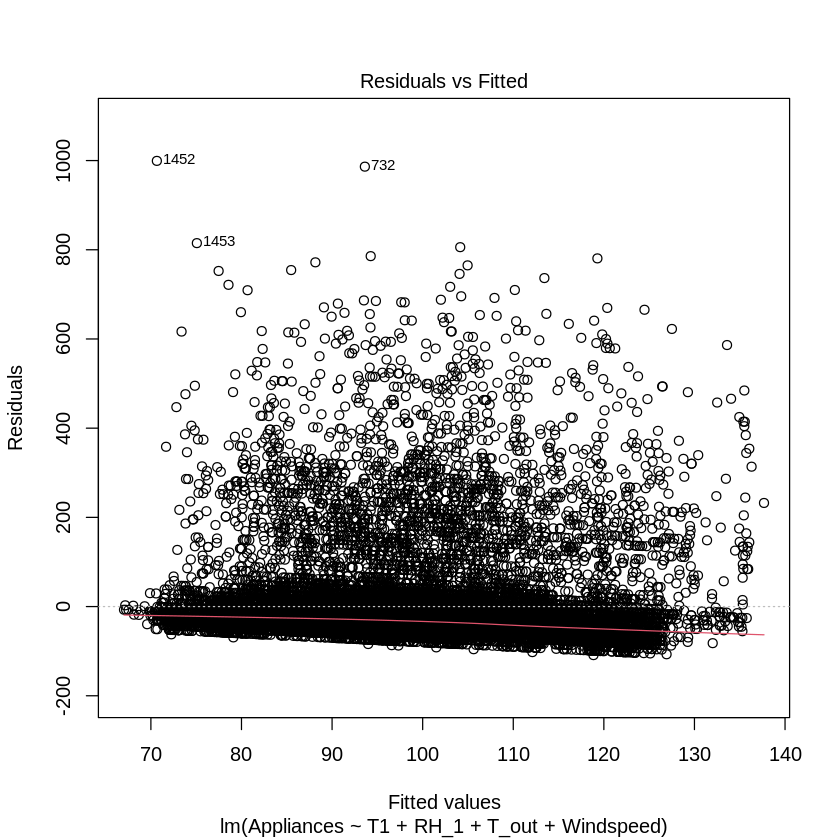

In [13]:
# Residuals vs Fitted Plot
plot(model, which = 1)

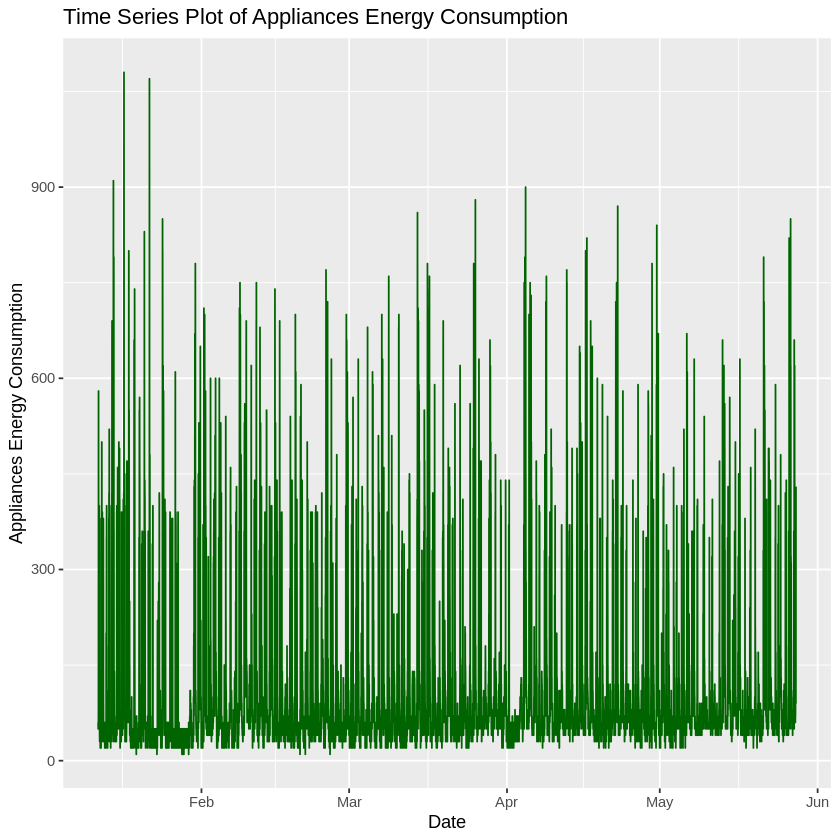

In [14]:
# 4. Time series plot of Appliances energy consumption
ggplot(data, aes(x=date, y=Appliances)) +
  geom_line(color="darkgreen") +
  ggtitle("Time Series Plot of Appliances Energy Consumption") +
  xlab("Date") +
  ylab("Appliances Energy Consumption")

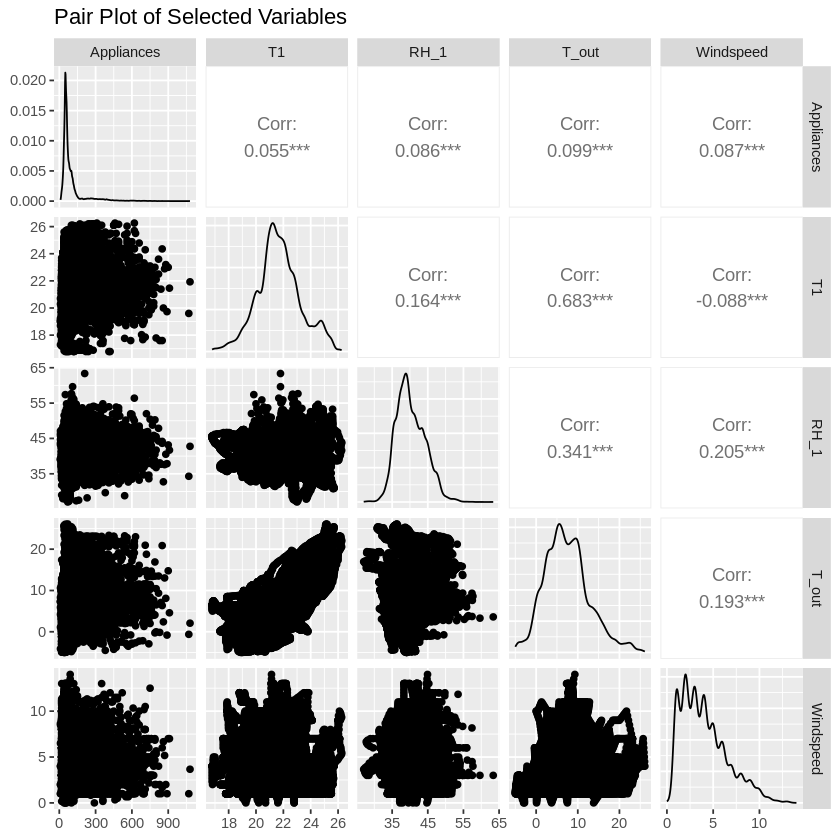

In [15]:
# 5. Pair plot of selected variables
selected_vars <- data %>% select(Appliances, T1, RH_1, T_out, Windspeed)
ggpairs(selected_vars, title = "Pair Plot of Selected Variables")

In [16]:
# Linear Regression Model and Visualization
# Predicting Appliances energy consumption using a simple linear regression
model <- lm(Appliances ~ T1 + RH_1 + T_out + Windspeed, data = data)
summary(model)


Call:
lm(formula = Appliances ~ T1 + RH_1 + T_out + Windspeed, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-108.85  -47.61  -31.02   -0.32  999.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.7532    15.7467   0.746    0.455    
T1            0.6685     0.6490   1.030    0.303    
RH_1          1.2767     0.1960   6.513 7.55e-11 ***
T_out         1.2034     0.2059   5.845 5.16e-09 ***
Windspeed     2.7540     0.3187   8.642  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 19730 degrees of freedom
Multiple R-squared:  0.01677,	Adjusted R-squared:  0.01657 
F-statistic: 84.12 on 4 and 19730 DF,  p-value: < 2.2e-16


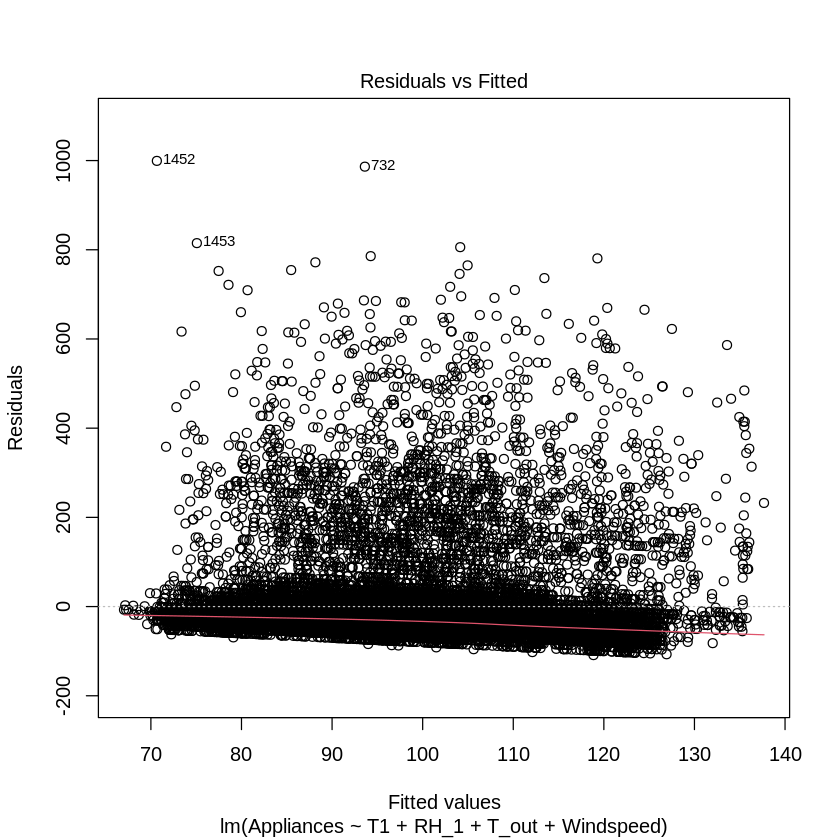

In [17]:
# Residuals vs Fitted Plot
plot(model, which = 1)

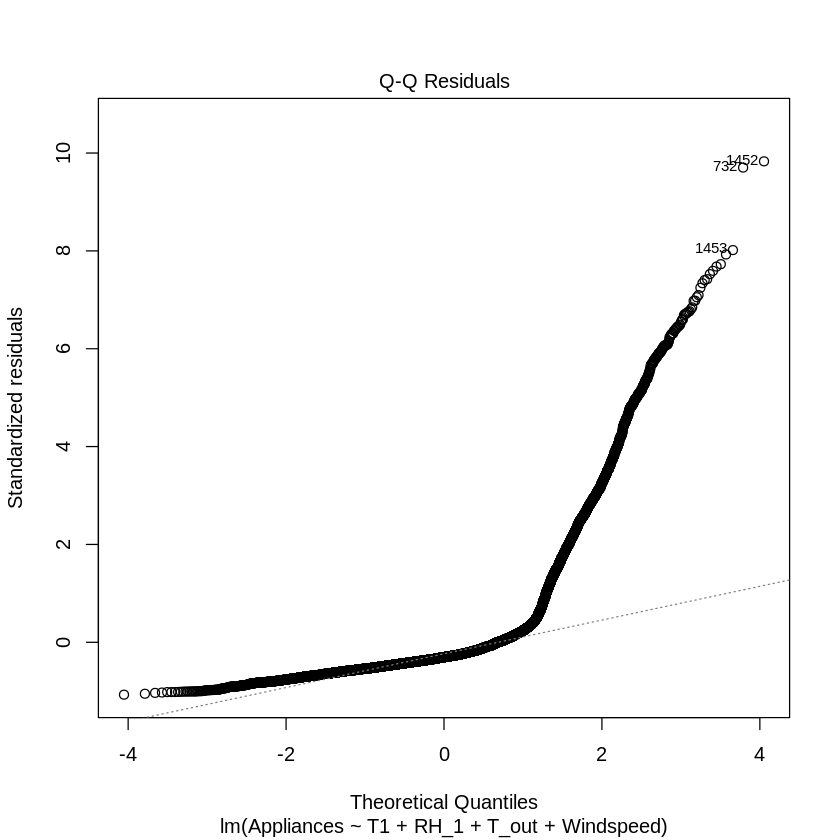

In [18]:
# Normal Q-Q Plot
plot(model, which = 2)

`geom_smooth()` using formula = 'y ~ x'


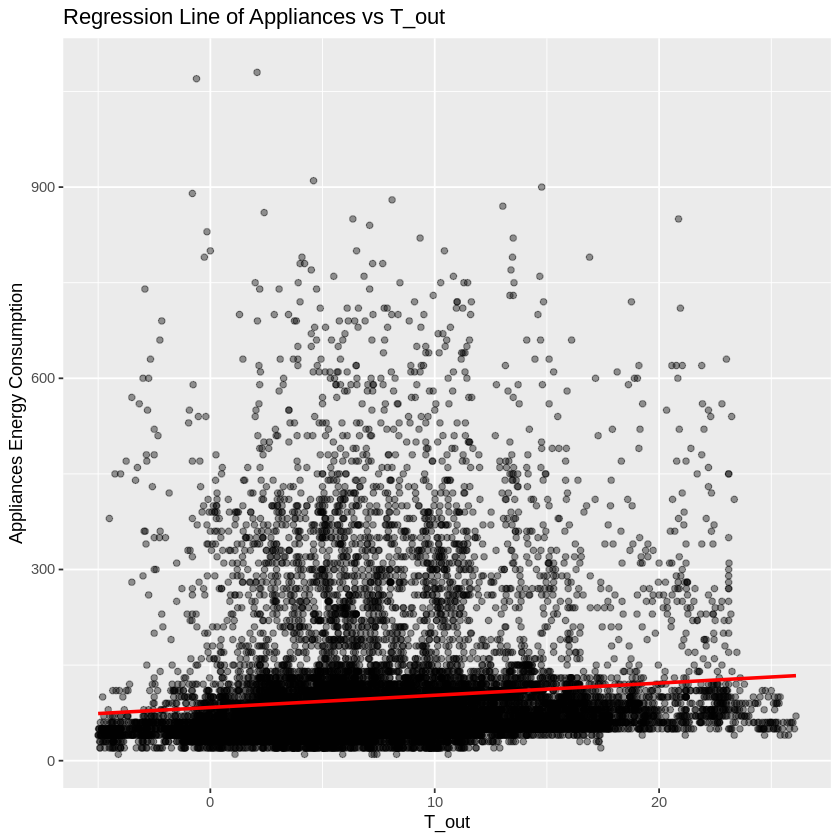

In [19]:
# Scatter plot with regression line (Appliances vs T_out)
ggplot(data, aes(x=T_out, y=Appliances)) +
  geom_point(alpha=0.4) +
  geom_smooth(method='lm', se=FALSE, color='red') +
  ggtitle("Regression Line of Appliances vs T_out") +
  xlab("T_out") +
  ylab("Appliances Energy Consumption")

Rows: 19735 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (28): Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, R...
dttm  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [19,735 × 29] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date       : POSIXct[1:19735], format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : num [1:19735] 60 60 50 50 60 50 60 60 60 70 ...
 $ lights     : num [1:19735] 30 30 30 40 40 40 50 50 40 40 ...
 $ T1         : num [1:19735] 19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num [1:19735] 47.6 46.7 46.3 46.1 46.3 ...
 $ T2         : num [1:19735] 19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num [1:19735] 44.8 44.7 44.6 44.6 44.5 ...
 $ T3         : num [1:19735] 19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num [1:19735] 44.7 44.8 44.9 45 45 ...
 $ T4         : num [1:19735] 19 19 18.9 18.9 18.9 ...
 $ RH_4       : num [1:19735] 45.6 46 45.9 45.7 45.5 ...
 $ T5         : num [1:19735] 17.2 17.2 17.2 17.2 17.2 ...
 $ RH_5       : num [1:19735] 55.2 55.2 55.1 55.1 55.1 ...
 $ T6         : num [1:19735] 7.03 6.83 6.56 6.43 6.37 ...
 $ RH_6       : num [1:19735] 84.3 84.1 83.2 83.4 84.9 ...
 $ T7         : num [


Call:
lm(formula = Appliances ~ T1 + RH_1 + T2 + RH_2 + T_out + Windspeed + 
    Visibility, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-289.68  -47.89  -25.72    2.55  975.02 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.97104   15.92192   6.342 2.32e-10 ***
T1           23.52768    1.28470  18.314  < 2e-16 ***
RH_1         19.73495    0.62378  31.638  < 2e-16 ***
T2          -26.58774    1.36513 -19.476  < 2e-16 ***
RH_2        -19.36947    0.61545 -31.472  < 2e-16 ***
T_out         1.09217    0.23454   4.657 3.24e-06 ***
Windspeed     1.44803    0.31173   4.645 3.42e-06 ***
Visibility    0.04618    0.05980   0.772     0.44    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.72 on 19727 degrees of freedom
Multiple R-squared:  0.07317,	Adjusted R-squared:  0.07284 
F-statistic: 222.5 on 7 and 19727 DF,  p-value: < 2.2e-16


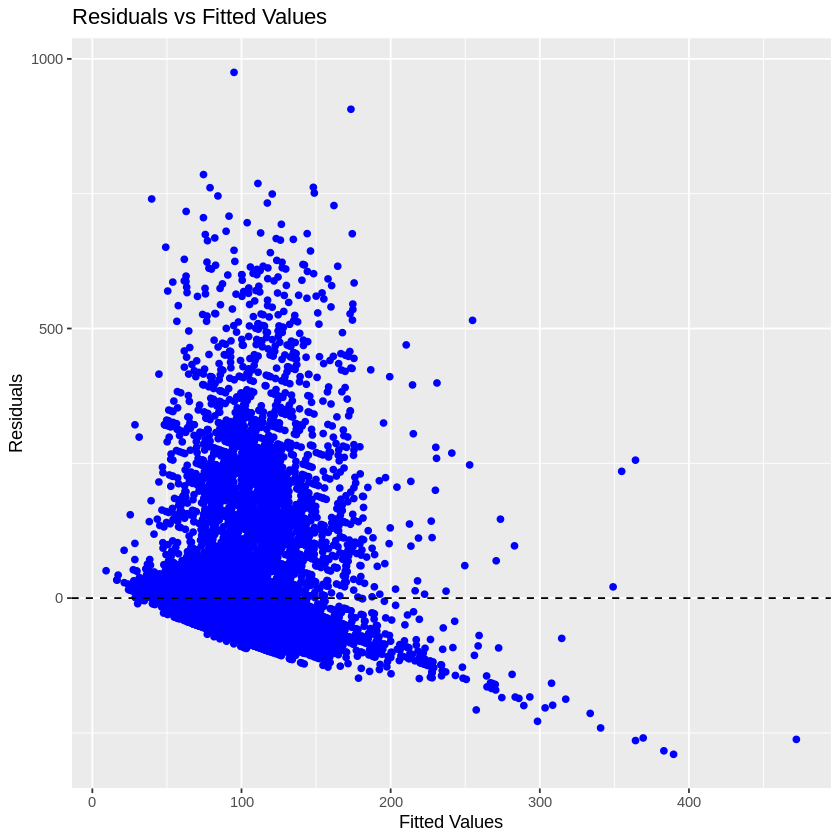

[1] "/content"
[1] "data_application_energy (1).csv" "sample_data"                    


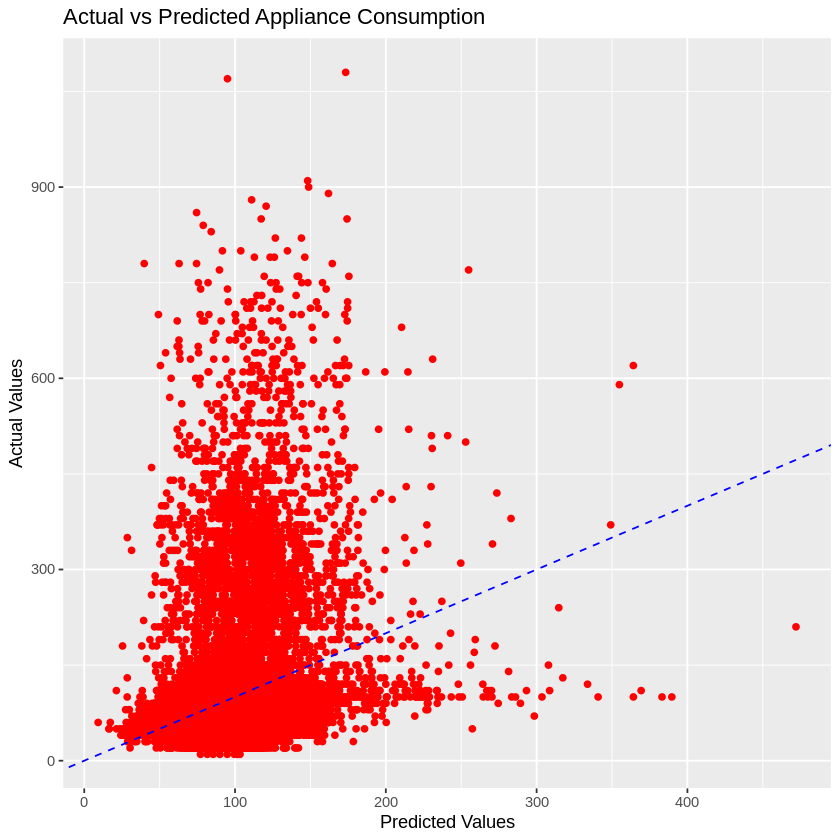

In [21]:
# Load necessary libraries
library(readr)    # For reading CSV files
library(ggplot2)  # For plotting

# Load the dataset
# Replace 'data_application_energy.csv' with the actual file name
# If the file is not in your current directory, provide the full path
data <- read_csv("/content/data_application_energy (1).csv")

# Check the structure of the data to identify relevant variables
str(data)

# Fit a linear regression model using key predictors
# Example: using temperature, humidity, windspeed, and visibility as predictors
model <- lm(Appliances ~ T1 + RH_1 + T2 + RH_2 + T_out + Windspeed + Visibility, data = data)

# Display summary of the regression model to see coefficients and p-values
summary(model)

# Plot residuals vs fitted values to assess model fit
ggplot(model, aes(.fitted, .resid)) +
  geom_point(color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  ggtitle("Residuals vs Fitted Values") +
  xlab("Fitted Values") + ylab("Residuals")

# Plot the actual vs predicted values
data$predicted <- predict(model)
ggplot(data, aes(x = predicted, y = Appliances)) +
  geom_point(color = "red") +
  geom_abline(slope = 1, intercept = 0, color = "blue", linetype = "dashed") +
  ggtitle("Actual vs Predicted Appliance Consumption") +
  xlab("Predicted Values") + ylab("Actual Values")

# Print your current working directory to check where R is looking for files
print(getwd())

# List files in your current working directory to see if your data file is present
print(list.files())

Rows: 19735 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (28): Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, R...
dttm  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [19,735 × 29] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date       : POSIXct[1:19735], format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : num [1:19735] 60 60 50 50 60 50 60 60 60 70 ...
 $ lights     : num [1:19735] 30 30 30 40 40 40 50 50 40 40 ...
 $ T1         : num [1:19735] 19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num [1:19735] 47.6 46.7 46.3 46.1 46.3 ...
 $ T2         : num [1:19735] 19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num [1:19735] 44.8 44.7 44.6 44.6 44.5 ...
 $ T3         : num [1:19735] 19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num [1:19735] 44.7 44.8 44.9 45 45 ...
 $ T4         : num [1:19735] 19 19 18.9 18.9 18.9 ...
 $ RH_4       : num [1:19735] 45.6 46 45.9 45.7 45.5 ...
 $ T5         : num [1:19735] 17.2 17.2 17.2 17.2 17.2 ...
 $ RH_5       : num [1:19735] 55.2 55.2 55.1 55.1 55.1 ...
 $ T6         : num [1:19735] 7.03 6.83 6.56 6.43 6.37 ...
 $ RH_6       : num [1:19735] 84.3 84.1 83.2 83.4 84.9 ...
 $ T7         : num [


Call:
lm(formula = Appliances ~ T1 + RH_1 + T2 + RH_2 + T_out + Windspeed + 
    Visibility, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-289.68  -47.89  -25.72    2.55  975.02 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.97104   15.92192   6.342 2.32e-10 ***
T1           23.52768    1.28470  18.314  < 2e-16 ***
RH_1         19.73495    0.62378  31.638  < 2e-16 ***
T2          -26.58774    1.36513 -19.476  < 2e-16 ***
RH_2        -19.36947    0.61545 -31.472  < 2e-16 ***
T_out         1.09217    0.23454   4.657 3.24e-06 ***
Windspeed     1.44803    0.31173   4.645 3.42e-06 ***
Visibility    0.04618    0.05980   0.772     0.44    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.72 on 19727 degrees of freedom
Multiple R-squared:  0.07317,	Adjusted R-squared:  0.07284 
F-statistic: 222.5 on 7 and 19727 DF,  p-value: < 2.2e-16


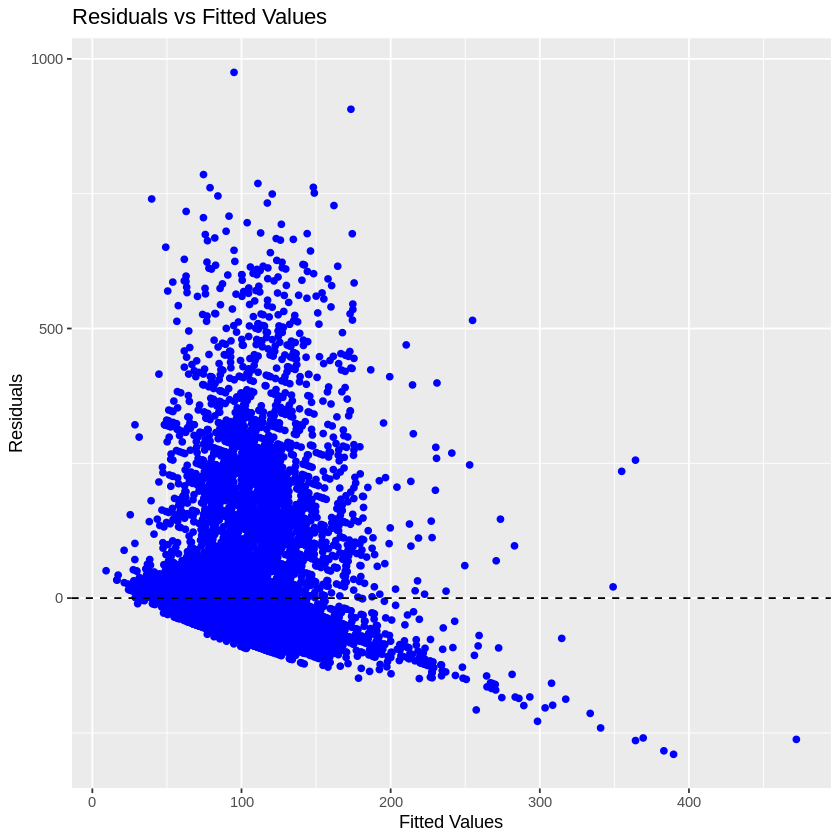

[1] "/content"
[1] "data_application_energy (1).csv" "sample_data"                    


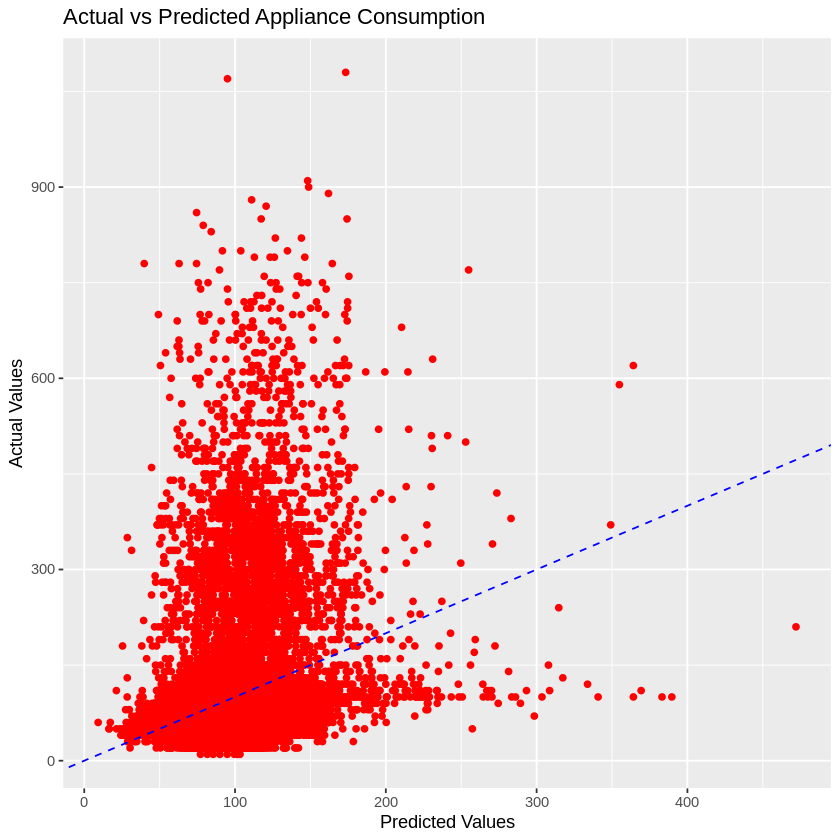

In [23]:
# Load necessary libraries
library(readr)    # For reading CSV files
library(ggplot2)  # For plotting

# Load the dataset
# Replace 'data_application_energy.csv' with the actual file name
# If the file is not in your current directory, provide the full path
data <- read_csv("/content/data_application_energy (1).csv")

# Check the structure of the data to identify relevant variables
str(data)

# Fit a linear regression model using key predictors
# Example: using temperature, humidity, windspeed, and visibility as predictors
model <- lm(Appliances ~ T1 + RH_1 + T2 + RH_2 + T_out + Windspeed + Visibility, data = data)

# Display summary of the regression model to see coefficients and p-values
summary(model)

# Plot residuals vs fitted values to assess model fit
ggplot(model, aes(.fitted, .resid)) +
  geom_point(color = "blue") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  ggtitle("Residuals vs Fitted Values") +
  xlab("Fitted Values") + ylab("Residuals")

# Plot the actual vs predicted values
data$predicted <- predict(model)
ggplot(data, aes(x = predicted, y = Appliances)) +
  geom_point(color = "red") +
  geom_abline(slope = 1, intercept = 0, color = "blue", linetype = "dashed") +
  ggtitle("Actual vs Predicted Appliance Consumption") +
  xlab("Predicted Values") + ylab("Actual Values")

# Print your current working directory to check where R is looking for files
print(getwd())

# List files in your current working directory to see if your data file is present
print(list.files())

In [24]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(Metrics) # For RMSE calculation

# Load the dataset
data <- read.csv('/content/data_application_energy (1).csv')

# Convert 'date' to Date-Time format if needed
data$date <- as.POSIXct(data$date, format="%Y-%m-%d %H:%M:%S")

# Select the dependent variable (Appliances) and independent variables for the regression
model_data <- data %>%
  select(Appliances, T1, RH_1, T_out, Windspeed, Visibility)

# Fit the linear regression model
model <- lm(Appliances ~ ., data = model_data)

# Display the summary of the linear regression model
summary(model)

# Predict the values based on the model
predictions <- predict(model, model_data)

# Calculate RMSE
rmse_value <- rmse(model_data$Appliances, predictions)
print(paste("RMSE: ", rmse_value))

# Calculate R-squared
r_squared <- summary(model)$r.squared
print(paste("R-squared: ", r_squared))


ERROR: Error in library(Metrics): there is no package called ‘Metrics’


In [25]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
install.packages("Metrics") # Install the Metrics package
library(Metrics) # For RMSE calculation

# Load the dataset
data <- read.csv('/content/data_application_energy (1).csv')

# Convert 'date' to Date-Time format if needed
data$date <- as.POSIXct(data$date, format="%Y-%m-%d %H:%M:%S")

# Select the dependent variable (Appliances) and independent variables for the regression
model_data <- data %>%
  select(Appliances, T1, RH_1, T_out, Windspeed, Visibility)

# Fit the linear regression model
model <- lm(Appliances ~ ., data = model_data)

# Display the summary of the linear regression model
summary(model)

# Predict the values based on the model
predictions <- predict(model, model_data)

# Calculate RMSE
rmse_value <- rmse(model_data$Appliances, predictions)
print(paste("RMSE: ", rmse_value))

# Calculate R-squared
r_squared <- summary(model)$r.squared
print(paste("R-squared: ", r_squared))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = Appliances ~ ., data = model_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-108.61  -47.68  -31.01   -0.26  997.77 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.78073   15.99844   0.549    0.583    
T1           0.68976    0.64931   1.062    0.288    
RH_1         1.27610    0.19602   6.510 7.69e-11 ***
T_out        1.21021    0.20600   5.875 4.30e-09 ***
Windspeed    2.75487    0.31867   8.645  < 2e-16 ***
Visibility   0.06474    0.06158   1.051    0.293    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 19729 degrees of freedom
Multiple R-squared:  0.01682,	Adjusted R-squared:  0.01657 
F-statistic: 67.52 on 5 and 19729 DF,  p-value: < 2.2e-16


[1] "RMSE:  101.656225104582"
[1] "R-squared:  0.016823848464822"
